# Importing the necessary libraries

In [151]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn.tree import export_graphviz
import graphviz

# Loading the dataset

In [152]:
music_data = pd.read_csv('./data/music.csv')

# Defining the features and the target variable
X = music_data.drop(columns=['genre'])
y = music_data['genre']


# Training the model for entire dataset

In [153]:
# Creating the model
model = DecisionTreeClassifier()

# Training the model to learn the patterns in the data
model.fit(X, y)

# Making predictions with a DataFrame to include feature names
input_data = pd.DataFrame([[21, 1], [22, 0]], columns=X.columns)
predictions = model.predict(input_data)

print(predictions)

['HipHop' 'Dance']


# Visualizing the Decision Tree

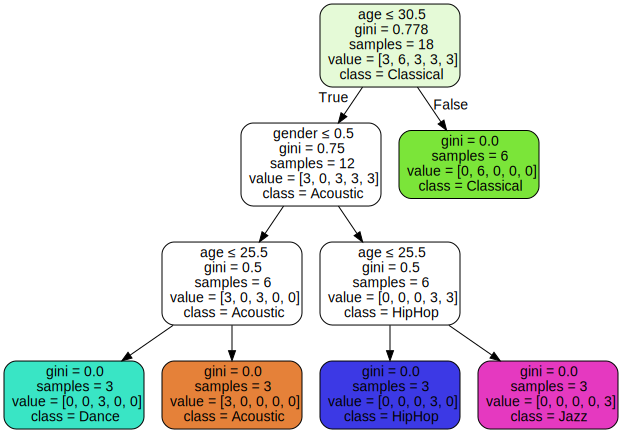

In [154]:
"""
    The decision tree can be visualized to understand how the model makes predictions. The decision
    tree can be exported to a file and then visualized using graphviz.
"""

"""
    The decision tree can be visualized to understand how the model makes predictions.
"""

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualizing and save the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree") 

graph

# Splitting the dataset into training and testing sets

In [155]:
"""
    The dataset is split into two sets, the training set and the testing set. The model is trained
    with the training set and tested with the testing set. This is done to evaluate the performance
    of the model.
"""

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

# Training the model with the training set
model.fit(train_X, train_y)

# Making predictions with the testing set
predictions = model.predict(test_X)

# Calculating the accuracy of the model

In [156]:
"""
    The accuracy of the model is calculated by comparing the predictions made by the model with 
    the actual values in the testing set.
"""

score = accuracy_score(test_y, predictions)

print(score)

0.5


# Model Persistence

## Saving the model

In [157]:
"""
    The model is saved to a file so that it can be used later without having to retrain the model.
"""

joblib.dump(model, 'music-recommender.joblib')

['music-recommender.joblib']

## Loading the model and making predictions

In [158]:
"""
    The model is loaded from the file and used to make predictions.
"""

model = joblib.load('music-recommender.joblib')

# Creating the input data with the same feature names used during training
input_data = pd.DataFrame([[21, 1], [22, 0]], columns=['age', 'gender'])

# Making predictions
predictions = model.predict(input_data)

predictions

array(['HipHop', 'Dance'], dtype=object)